###  신용 카드 사용 기록 EDA.

#### 0. 필요한 패키지를 불러온다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/GwangjuAI/확률/notebook"

[Errno 2] No such file or directory: '/content/drive/MyDrive/GwangjuAI/확률/notebook'
/content


In [4]:
pd.set_option("precision",3)

#### 1. 데이터를 불러와서 살펴 본다.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터 분석/별첨 1_DACON_신용카드 사용기록 EDA_최종/data_credit.csv")
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [6]:
df.shape

(3362796, 8)

In [7]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


#### 2. 데이터를 정제하고 결측치 처리를 한다.

In [8]:
# 결측치가 분명히 있는 것 같으니 컬럼별 집계해 본다.
df.isnull().sum(axis=0)

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [9]:
# 일시불이 NA로 처리 되었으니 결측치를 1로 채운다.
df = df.fillna(value=1)
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0


In [10]:
# 결측치를 다시 집계해 본다.
df.isnull().sum(axis=0)

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64

In [11]:
# Installments의 자료형을 정수로 바꾼다.
df['installments'] = df.installments.astype('int32')
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1,2,0


In [13]:
# month 파생 변수를 만든다.
df['month'] = df.date.apply(lambda x : x[5:7])
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,month
0,0,2016-12-14,18:05:31,d297bba73f,5,1,2,0,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,1,2,0,12
2,0,2016-12-19,12:42:31,0880849c05,144,1,0,0,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1,0,0,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,1,0,0,12
...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1,3,0,07
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1,3,0,07
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1,6,0,07
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1,2,0,07


In [14]:
# hour 파생 변수를 만든다.
df['hour'] = df.time.apply(lambda x : x[:2])
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,2016-12-14,18:05:31,d297bba73f,5,1,2,0,12,18
1,0,2016-12-14,18:05:54,d297bba73f,-5,1,2,0,12,18
2,0,2016-12-19,12:42:31,0880849c05,144,1,0,0,12,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1,0,0,12,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,1,0,0,12,13
...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1,3,0,07,17
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1,3,0,07,18
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1,6,0,07,14
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1,2,0,07,18


In [15]:
# date와 time은 더 이상 사용하지 않겠으니 제거한다.
df.drop(columns=['date', 'time'], inplace=True)

In [16]:
df

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1,2,0,12,18
1,0,d297bba73f,-5,1,2,0,12,18
2,0,0880849c05,144,1,0,0,12,12
3,0,8b4f9e0e95,66,1,0,0,12,12
4,0,7ad237eed0,24,1,0,0,12,13
...,...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,600,1,3,0,07,17
3362792,1799,8f41c89891,275,1,3,0,07,18
3362793,1799,aeb64fe1fb,350,1,6,0,07,14
3362794,1799,57932602d6,300,1,2,0,07,18


#### 3. 개개 변수별로 탐색한다.

3.1. store_id 등장 횟수의 히스토그램.

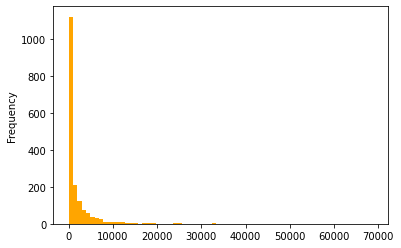

In [17]:
# store_id별 도수를 집계하고 히스토그램으로 출력해 본다.
df.store_id.value_counts().plot.hist(bins=70, color="orange")
plt.show()

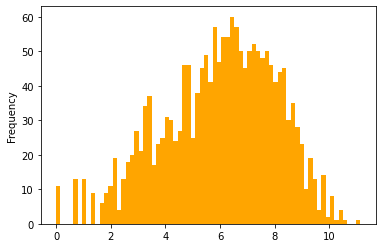

In [18]:
# 큰 skew를 보이므로 log 변환해서 다시 시각화 해본다.
np.log(df.store_id.value_counts()).plot.hist(bins=70, color="orange")
plt.show()

In [19]:
# 중위수를 계산해 본다.
freq1 = df.store_id.value_counts()
print(np.median(freq1))

492.0


In [20]:
# Top store_id를 본다.
freq1.sort_values(ascending=False)

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
608         1
1530        1
1263        1
991         1
Name: store_id, Length: 1775, dtype: int64

3.2. card_id 사용 횟수의 히스토그램.

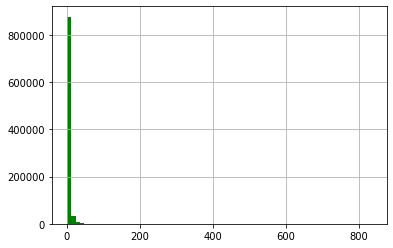

In [24]:
# card_id별 도수를 집계하고 히스토그램으로 출력해 본다.
df.card_id.value_counts().hist(bins = 70, color="green")
plt.show()

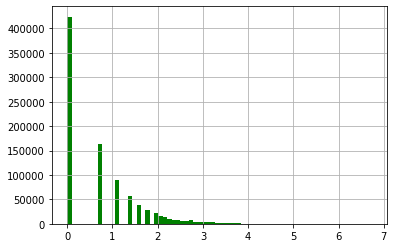

In [26]:
# 큰 skew를 보이므로 log 변환해서 다시 시각화 해본다.
np.log(df.card_id.value_counts()).hist(bins = 70, color="green")
plt.show()

In [27]:
# 중위수를 계산해 본다.
freq2 = df.card_id.value_counts()
print(np.median(freq2))

2.0


In [30]:
# 사용 횟수 Top 10 card_id를 본다.
freq2.sort_values(ascending=False)

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
             ... 
ad78304ebf      1
8836e73d4e      1
0bc7640c33      1
ec6861f3db      1
e369321d97      1
Name: card_id, Length: 922522, dtype: int64

3.3. amount의 히스토그램.

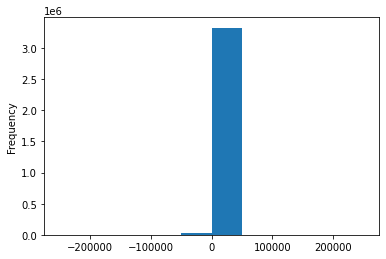

In [33]:
# amount를 히스토그램으로 출력해 본다.
df.amount.plot.hist(bins=10)
plt.show()

In [38]:
# 실제 구매 비율 (환불 아닌).
(df.amount > 0).mean() 

0.9896348157901936

In [39]:
# amount의 최소값과 최대값.
print(df.amount.min())
print(df.amount.max())

-250000
250000


In [42]:
# amount의 최소값과 최대값의 위치.
print(df.amount.argmax())
print(df.amount.argmin())

929470
929473


In [45]:
# amount의 최대값에 해당하는 거래내역.
df.iloc[df.amount.argmax()]

store_id               370
card_id         1c492f54f0
amount              250000
installments             3
days_of_week             0
holyday                  0
month                   01
hour                    12
Name: 929470, dtype: object

In [46]:
# amount의 최소값에 해당하는 거래내역.
df.iloc[df.amount.argmin()]

store_id               370
card_id         1c492f54f0
amount             -250000
installments             3
days_of_week             0
holyday                  0
month                   03
hour                    19
Name: 929473, dtype: object

In [47]:
# 조금 수상하다!
# store 370번 검색.
df[df.store_id == 370]

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
929460,370,ff30f07073,1650,1,6,0,09,21
929461,370,3a595a5d17,4485,3,3,0,10,17
929462,370,4420052bfd,10000,12,1,0,11,00
929463,370,03eec4e981,27500,3,3,0,11,11
929464,370,d755eb0fa2,11000,1,4,0,11,12
...,...,...,...,...,...,...,...,...
929651,370,d8b799ac0c,-50000,3,1,0,07,19
929652,370,d8b799ac0c,-50000,3,1,0,07,19
929653,370,d8b799ac0c,-50000,3,1,0,07,19
929654,370,d8b799ac0c,-8320,3,1,0,07,19


In [49]:
# store 370번의 amount 중 환불 비율.
# 평균인 1% 보다 높다!
(df[df.store_id == 370].amount > 0).mean()

0.6377551020408163

In [51]:
# store 370번의 amount (절대값)의 평균.
np.abs(df[df.store_id == 370].amount).mean()

28189.90306122449

In [50]:
# card 1c492f54f0 검색.
# 거래 내역 단 2건!  수상하다!
df[df.card_id == "1c492f54f0"]

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
929470,370,1c492f54f0,250000,3,0,0,01,12
929473,370,1c492f54f0,-250000,3,0,0,03,19


3.4. installments의 막대그림.

In [52]:
# 유형의 가짓수.
df.installments.nunique()

17

In [53]:
# 도수표로 정리해서 본다.
freq3 = df.installments.value_counts()
freq3.sort_index()

1     3345936
2        3431
3       10686
4         209
5        1220
6         647
7          28
8          32
9          25
10        252
12        206
15          2
18         11
20          6
22          4
24         96
36          5
Name: installments, dtype: int64

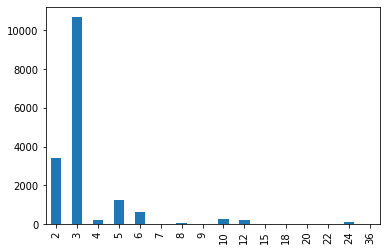

In [54]:
# installment = 1 (일시불)이 너무나 많으니 제거하고 시각화 해본다.
freq3b = df[df.installments != 1].installments.value_counts()
freq3b = freq3b.sort_index()
freq3b.plot.bar()
plt.show()

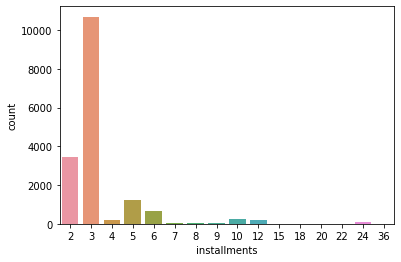

In [60]:
# Seaborn을 사용한 다른 방법.
sns.countplot(data = df[df.installments != 1], x='installments')    
plt.show() 

3.5. days_of_week의 도수 막대그림.

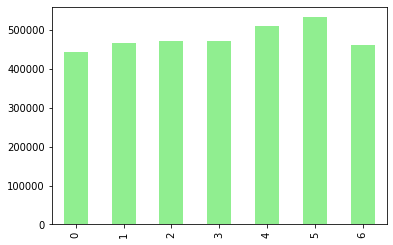

In [66]:
# days_of_week의 도수분포를 막대그림으로 출력해 본다.
freq4 = df.days_of_week.value_counts()
freq4 = freq4.sort_index()
freq4.plot.bar(color='lightgreen')
plt.show()

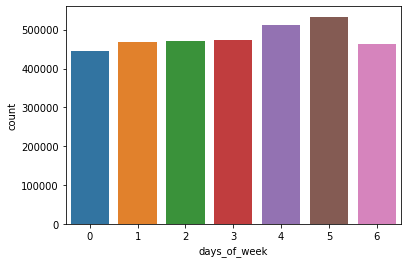

In [67]:
# Seaborn의 countplot() 함수로 집계하여 보여준다.
sns.countplot(data=df, x='days_of_week')
plt.show()

3.6. holiday의 막대그림.

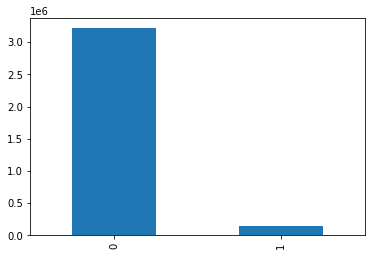

In [68]:
# holiday의 도수분포를 막대그림으로 출력해 본다.
freq5 = df.holyday.value_counts()                    # 스펠링 오류!!! 
freq5 = freq5.sort_index()
freq5.plot.bar()
plt.show()

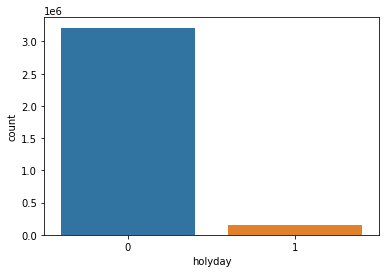

In [71]:
# Seaborn의 countplot() 함수로 집계하여 보여준다.
sns.countplot(data=df, x='holyday')
plt.show()

#### 4. 수치형 변수 1개 + 명목형 변수 1개를 조합한 탐색.

4.1. store_id 별 결제 금액.

In [82]:
# 평균 금액 랭킹 top 10.
df.groupby("store_id").amount.mean().sort_values(ascending=False)

store_id
1600    57750.000
847     49000.000
334     21334.746
536     20417.083
389     14642.857
          ...    
703         5.000
826         2.500
350         0.000
988         0.000
866         0.000
Name: amount, Length: 1775, dtype: float64

In [89]:
# Pivot table 방식으로 다시 해본다.
pd.pivot_table(df, index = 'store_id', values = 'amount', aggfunc = np.mean).sort_values(by='amount', ascending=False)

,amount
store_id,
1600,57750.000
847,49000.000
334,21334.746
536,20417.083
389,14642.857
...,...
608,5.000
826,2.500
988,0.000


In [90]:
# 총 금액 랭킹 top 10.
df.groupby('store_id').amount.sum().sort_values(ascending=False)[:10]

store_id
753     9474601
1342    7301327
161     5236075
0       5234611
958     4965728
1076    4860885
810     3677501
1024    3330293
486     3235482
597     2999180
Name: amount, dtype: int64

In [91]:
# Pivot table 방식으로 다시 해본다.
pd.pivot_table(df, index='store_id', values='amount', aggfunc = np.sum).sort_values(by='amount', ascending=False)

,amount
store_id,
753,9474601
1342,7301327
161,5236075
0,5234611
958,4965728
...,...
826,5
608,5
350,0


4.2. card_id 별 결제 금액.

In [93]:
# 평균 금액 랭킹 top 10.
df.groupby('card_id')['amount'].mean().sort_values(ascending=False)[:10]

card_id
fae5d55226    101190.000
7fbba44248     73388.000
e5d233d934     49000.000
704b7f81dc     45570.000
f408c22f2a     45000.000
de78de56a0     41130.769
0aba1043b4     38500.000
75e5119315     36313.000
784f7b2053     34830.000
409ed21309     31336.000
Name: amount, dtype: float64

In [94]:
# 총 금액 랭킹 top 10.
df.groupby('card_id')['amount'].sum().sort_values(ascending=False)[:10]

card_id
f8218bde68    761667
4a26873e51    562793
d8b799ac0c    551625
de78de56a0    534700
2796a2b778    375918
a5a894cfa6    344577
3a9deab63f    333884
46a88eb161    283820
10a5c30cda    241858
48e87aab97    235428
Name: amount, dtype: int64

4.3. installments별 결제 금액.

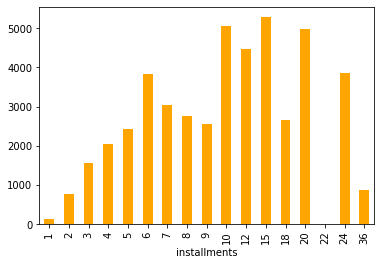

In [99]:
# installments별 평균.
data = df.groupby('installments').amount.mean()
data.plot.bar(color='orange')
plt.show()

4.4. 요일별 결제 금액.

In [100]:
df

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1,2,0,12,18
1,0,d297bba73f,-5,1,2,0,12,18
2,0,0880849c05,144,1,0,0,12,12
3,0,8b4f9e0e95,66,1,0,0,12,12
4,0,7ad237eed0,24,1,0,0,12,13
...,...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,600,1,3,0,07,17
3362792,1799,8f41c89891,275,1,3,0,07,18
3362793,1799,aeb64fe1fb,350,1,6,0,07,14
3362794,1799,57932602d6,300,1,2,0,07,18


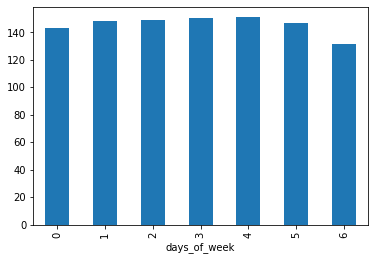

In [103]:
# 요일별 평균.
data = df.groupby('days_of_week').amount.mean()
data.plot.bar()
plt.show()

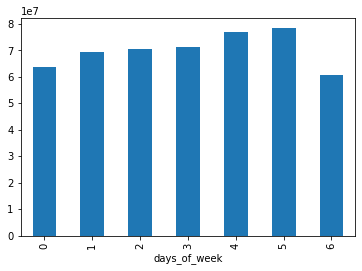

In [104]:
# 요일별 total.
ser = df.groupby('days_of_week').amount.sum()
ser.plot.bar()
plt.show()

4.5. 휴일 여부와 결제 금액.

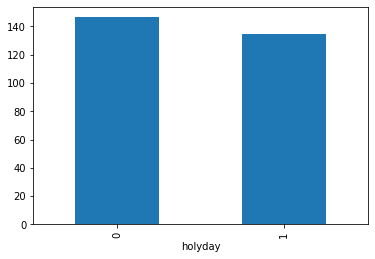

In [106]:
# 평균.
data = df.groupby('holyday').amount.mean()
data.plot.bar()
plt.show()

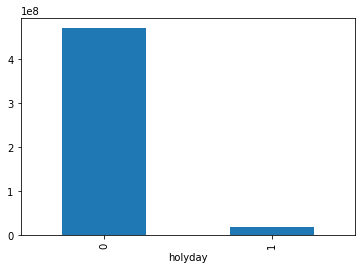

In [107]:
# Total
ser = df.groupby('holyday').amount.sum()
ser.plot.bar()
plt.show()

4.6. 월별 결제 금액.

In [ ]:
# 평균.
ser = df.groupby('month').amount.mean()
ser.plot()
plt.show()

In [ ]:
# Total.
# 자료가 끊겨서 이상하게 보인다!
ser = df.groupby('month').amount.sum()
ser.plot()
plt.show()

4.7. 시간대별 결제 금액.

In [ ]:
# 평균.
ser = df.groupby('hour').amount.mean()
ser.plot()
plt.show()

In [ ]:
# Total.
ser = df.groupby('hour').amount.sum()
ser.plot()
plt.show()

#### 5. 수치형 변수 1개 + 명목형 변수 2개를 조합한 탐색.

5.1. 월별 시간대별 매출 추이.

In [108]:
# 평균.
df2 = pd.pivot_table(df, index="hour", columns="month", values = "amount", aggfunc=np.mean)
df2

month,01,02,03,04,05,06,07,08,09,10,11,12
hour,,,,,,,,,,,,
00,192.736,203.609,225.964,198.592,199.028,192.277,185.891,196.780,192.896,191.984,198.967,217.122
01,208.433,227.761,216.638,211.933,214.245,191.627,198.370,203.332,205.010,207.598,210.656,218.045
02,205.604,207.924,220.711,219.175,199.149,194.251,187.891,231.292,203.670,199.082,228.466,226.965
03,203.848,178.870,191.746,196.250,197.370,193.934,190.860,185.507,187.959,182.075,216.382,210.332
04,190.185,147.371,166.431,179.182,168.152,152.341,149.105,153.946,142.548,186.234,200.010,179.452
05,110.955,113.261,132.616,202.527,188.839,128.401,127.410,120.368,122.898,131.375,119.376,124.973
06,147.489,143.390,134.315,128.857,135.596,138.224,133.726,117.859,133.520,154.302,103.805,135.911
07,102.358,120.017,129.414,111.112,105.077,101.193,114.557,105.843,98.854,103.428,96.307,104.329
08,100.615,103.014,97.210,95.850,91.793,90.919,90.082,95.663,86.232,71.078,87.385,103.214


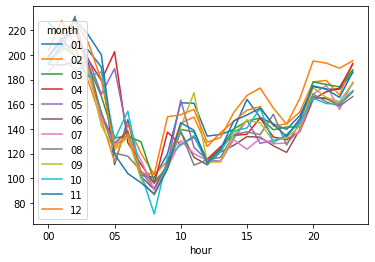

In [109]:
# 시각화.
df2.plot()
plt.show()

5.2. 요일별 시간대별 매출 추이.

In [113]:
# 평균.
df3 = pd.pivot_table(df, index="hour", columns="days_of_week", values = "amount", aggfunc=np.mean)
df3

days_of_week,0,1,2,3,4,5,6
hour,,,,,,,
00,150.061,210.702,225.979,218.083,220.911,204.942,167.800
01,160.054,226.176,230.292,240.749,235.292,210.672,174.276
02,160.799,226.434,216.028,229.174,230.299,218.076,185.959
03,147.924,200.282,191.244,211.309,201.385,217.112,180.853
04,144.016,145.821,158.366,181.167,149.240,197.756,172.184
05,111.075,115.056,163.391,161.128,131.997,134.063,140.603
06,126.597,138.998,149.387,128.681,135.977,134.712,120.143
07,105.695,105.688,105.211,105.914,111.059,116.759,109.554
08,93.974,89.018,86.898,84.537,89.162,108.522,105.589


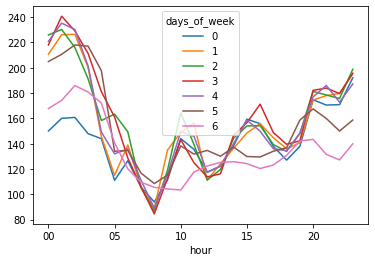

In [114]:
# 시각화.
df3.plot()
plt.show()

#### 6. 등급화.

6.1. store_id 별 Total 결제 금액에 의한 3 등급 분류.

In [119]:
# store_id별 total 결제 금액에 의한 3 등급 분류. HINT: pd.qcut() 사용.
data1 = df.groupby('store_id').amount.sum()
data2 = pd.qcut(data1, 3, labels=['LOW', 'MEDIUM', 'HIGH'])
combo = pd.DataFrame({"store id" : data1.index, "amount" : data1.values, "category" : data2.values})
combo[:10]

,store id,amount,category
0,0,5234611,HIGH
1,1,147950,MEDIUM
2,2,1615060,HIGH
3,3,62781,MEDIUM
4,4,270312,HIGH
5,5,184437,MEDIUM
6,6,1389983,HIGH
7,7,109510,MEDIUM
8,8,515535,HIGH
9,9,19760,LOW


In [122]:
# 등급별 평균.
combo.groupby('category')['amount'].mean()

category
LOW        23272.583
MEDIUM    125787.788
HIGH      680276.184
Name: amount, dtype: float64

6.2. card_id 별 Total 결제 금액에 의한 3 등급 분류.

In [123]:
# card_id별 total 결제 금액에 의한 3 등급 분류. HINT: pd.qcut() 사용.
data1 = df.groupby('card_id').amount.sum()
data2 = pd.qcut(data1, 3, labels=['LOW', 'MEDIUM', 'HIGH'])
combo = pd.DataFrame({"card id" : data1.index, "amount" : data1.values, "category" : data2.values})
combo[:10]

,card id,amount,category
0,000009e765,10,LOW
1,00000f9eaa,331,MEDIUM
2,0000134335,90,LOW
3,000024f480,80,LOW
4,000036a26b,720,HIGH
5,00003c84e3,255,MEDIUM
6,00003cb9a7,85,LOW
7,000043b1cb,1186,HIGH
8,000055e420,187,MEDIUM
9,00008a3f32,335,MEDIUM


In [124]:
# 등급별 평균.
combo.groupby('category')['amount'].mean()

category
LOW         63.730
MEDIUM     219.316
HIGH      1318.056
Name: amount, dtype: float64